# 3o Εργαστήριο Στοχ. Διαδικασιών 

In [1]:
#Erwthseis Katanohshs 
# 
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code
def rm_plot():
    plt.clf()
    plt.cla()
    plt.close()


# to plot the results in the notebook:
#%matplotlib inline FIXME disabled

#1. Giati einai mia eutheia?
#2. H klhsh ths eythias einai 
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)
y = 32 * x**3
newx = np.log2(x)
newy = np.log2(y)
poly = np.polyfit(newx,newy,1)
print ("Η κλήση της ευθείας ειναι {}".format(int(np.ceil(poly[0]))))
print ("Το σημείο που τέμνει τον logx = 0 είναι ({},{})".format(0,int(poly[1])))


Η κλήση της ευθείας ειναι 3
Το σημείο που τέμνει τον logx = 0 είναι (0,5)


# Ερωτήσεις Κατανόησης
1. Γιατί αν $y = \log_2(b\cdot x^a)$ και $\log_2(b\cdot x^a) = \log_2b + a\log_2x$ όπου για $x = \log_2x \Rightarrow y = ax + b$
2. Σύμφωνα με το (1.) έχουμε ότι $a = 3$ και $b = 5$.
3. Η κλήση των 2 ευθειών εξαρτάται μόνο από την δύναμη του $x$ άρα για $x^3 \rightarrow a_{x^3} = 3$ και ομοίως $x^2 \rightarrow a_{x^2} = 2$.

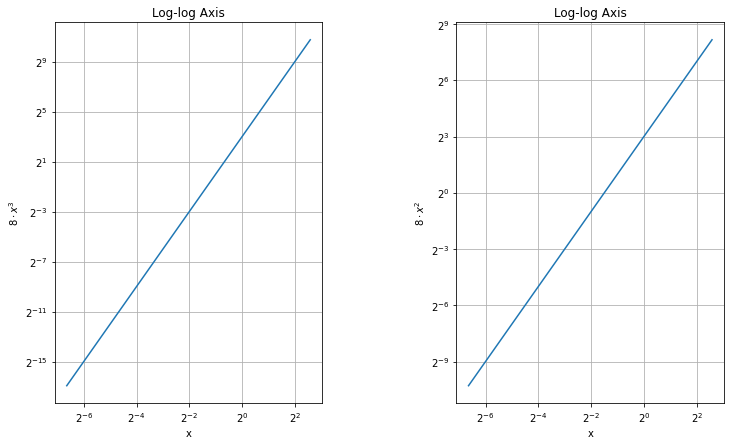

In [2]:
#3. 
# Create a list of real numbers from start to end by step
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]
# Compute f(x) = 32 * x^3 for every element of x
y1 = 8 * x**3
y2 = 8 * x**2
# Right Axes
plt.figure(figsize=(12, 7))  # define figure size
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.loglog(x, y1, basex=2, basey=2)
plt.xlabel('x')
plt.ylabel('$8\cdot x^3$')
plt.title('Log-log Axis')
plt.grid()  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y2, basex=2, basey=2)
plt.xlabel('x')
plt.ylabel('$8\cdot x^2$')
plt.title('Log-log Axis')
plt.grid()

plt.subplots_adjust(wspace = 0.5)
plt.show() # FIXME Enabled!
rm_plot()


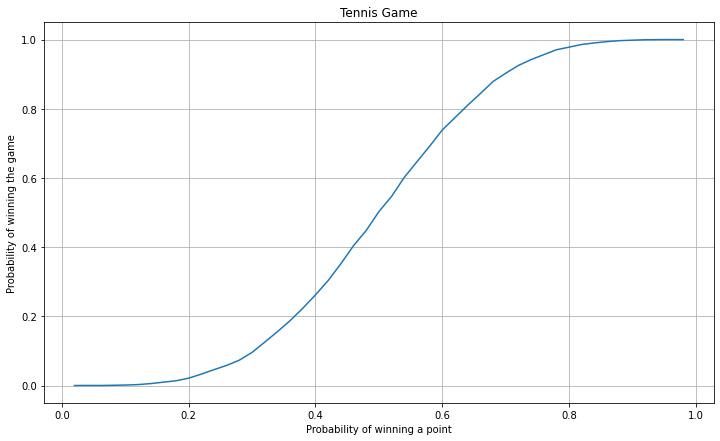

In [3]:
import statistics as stat
import random
random.seed(2020)  # for reproducibility
from simple_markov_chain_lib import markov_chain

#  Tenis

        #   0       1       2       3       4      
States = ["0-0", "15-0", "0-15", "30-0", "15-15",
        #  5       6       7       8       9     
         "0-30", "40-0","30-15","15-30","0-40",
        #   10      11       12     13      14   
         "40-15","Deuce", "15-40","GameA","AdvA",
        #    15      16            
           "AdvB","GameB"]
# A dictionary for the initial distibution. 
# We prescribe the initial distribution
 
 
pAll = np.arange(0.02,1.0,0.02)
FpAll = []
for p in pAll:
    q = 1-p

    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    markov_table = {
        States[0]: {States[1]: p, States[2]: q},
        States[1]: {States[3]: p, States[4]: q},
        States[2]: {States[4]: p, States[5]: q},
        States[3]: {States[6]: p, States[7]: q},
        States[4]: {States[7]: p, States[8]: q},
        States[5]: {States[8]: p, States[9]: q},
        States[6]: {States[13]: p, States[10]: q},
        States[7]: {States[10]: p, States[11]: q},
        States[8]: {States[11]: p, States[12]: q},
        States[9]: {States[12]: p, States[16]: q},
        States[10]: {States[13]: p, States[14]: q},
        States[11]: {States[14]: p, States[15]: q},
        States[12]: {States[15]: p, States[16]: q},
        States[13]: {States[13]: 1.},
        States[14]: {States[13]: p, States[11]: q},
        States[15]: {States[11]: p, States[16]: q},
        States[16]: {States[16]: 1.}
    }


    init_probs = {States[0]: 1.0} 
    # Ok... we are ready know
    # Let"s construct a Markov Chain. So let"s call the constructor
    mc = markov_chain(markov_table, init_probs)
    N = 20000
    steps = 0  # the target time
    counter = 0  # to count the number of times the event {X_40  = 1} occurs
    ## Simulation
    for i in range(N):
        mc.start()  # new experiment
        while(mc.running_state not in [States[13],States[16]]):  
            mc.move()
            steps += 1
        if mc.running_state == States[13]:  
            counter += 1
            #stepsTrack.append(steps)
        steps = 0
    phat = counter / N
    FpAll.append(phat)

FpAll = np.array(FpAll)
plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot(pAll,FpAll)
plt.title("Tennis Game")
plt.xlabel("Probability of winning a point")
plt.ylabel("Probability of winning the game")
plt.grid()
plt.show() # FIXME Enabled!
rm_plot()



# Παραδοτέο 1
## Τένις 
Η γραφική παράσταση που προέκυψε είναι και η αναμενόμενη διότι όσο αυξάνεται η πιθανότητα να κερδίσει ένα πόντο τόσο πιο πολύ αυξάνεται η πιθανότητα να κερδίσει το ματς. Επίσης όταν η πιθανότητα να πάρει τον πόντο είναι 0.5 τόση είναι και η πιθανότητα να πάρει το ματς

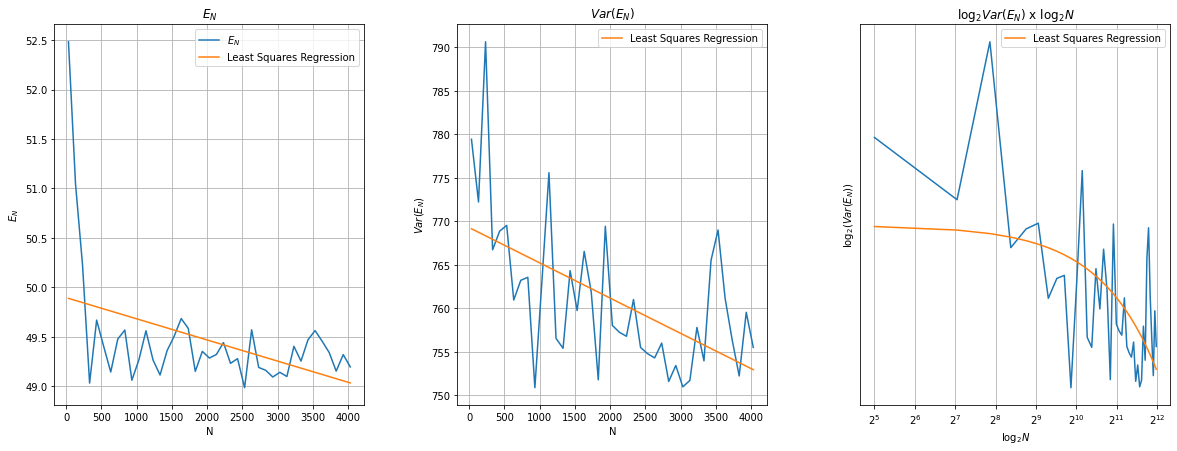

Η κλήση της $Var(E_N)$, χρησημοποιώντας τη μέθοδο των ελαχίστων τετραγώνων, είναι  -0.004050163472120913


In [4]:
# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

#sample_sizeAll = np.array([2**x for x in range(5,13,1)]) # Ν
sample_sizeAll = np.arange(2**5,2**12,100)
VarAll = []
EnAll = []
for sample_size in sample_sizeAll:
    mc = markov_chain(markov_table, init_dist)
    running_total = 0
    totalEnAll = []
    M = 30
    for i in range(M):
        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed
        mc_estimate = running_total/sample_size
        totalEnAll.append(mc_estimate)
    EnAll.append(np.mean(totalEnAll))
    VarAll.append(np.var(totalEnAll))
VarAll = np.array(VarAll)
EnAll = np.array(EnAll)

plt.figure(figsize=(20, 7))  # define figure size

plt.subplot(1, 3, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(sample_sizeAll, EnAll, label = "$E_N$")
polyEn = np.polyfit(sample_sizeAll,EnAll,1)
plt.plot(sample_sizeAll, polyEn[0]*sample_sizeAll + polyEn[1], label = "Least Squares Regression")
plt.xlabel('N')
plt.ylabel('$E_N$')
plt.title('$E_N$')
plt.grid()  # add grid-lines
plt.legend()

# Left Axes
plt.subplot(1, 3, 2) # select the 2nd subplot
plt.plot(sample_sizeAll, VarAll)
polyVar = np.polyfit(sample_sizeAll,VarAll,1)
plt.plot(sample_sizeAll, polyVar[0]*sample_sizeAll + polyVar[1], label = "Least Squares Regression")
plt.xlabel('N')
plt.ylabel('$Var(E_N)$')
plt.legend()
plt.title('$Var(E_N)$')
plt.grid()

# Left Axes
plt.subplot(1, 3, 3) # select the 2nd subplot
plt.loglog(sample_sizeAll, VarAll, basex=2, basey=2)
polyVarlog = np.polyfit(sample_sizeAll,VarAll,1)
plt.loglog(sample_sizeAll, polyVarlog[0]*sample_sizeAll + polyVarlog[1], basex=2, basey=2, label = "Least Squares Regression")
plt.xlabel('$\log_2 N$')
plt.ylabel('$\log_2(Var(E_N))$')
plt.legend()
plt.title('$\log_2 Var(E_{N})$ x $\log_2 N$')
plt.grid()


plt.subplots_adjust(wspace = 0.3)
plt.show() # FIXME Enabled!
rm_plot()

# Παραδοτέο 2
Όπως ήταν αναμενόμενο, όσο αυξάνεται το μέγεθος του δείγματος μικραίνει η διασπορά $Var(E_N)$ της εκτιμήτριας $Ε_Ν$. 

In [5]:
print("Η κλήση της Var(E_N), χρησημοποιώντας τη μέθοδο των ελαχίστων τετραγώνων, είναι ", polyVar[0])

Η κλήση της Var(E_N), χρησημοποιώντας τη μέθοδο των ελαχίστων τετραγώνων, είναι  -0.004050163472120913
